# library imports

In [215]:
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt
import pandas as pd

# read .shp land use raw data

In [222]:
zone_lat_long = pd.read_excel("./raw_data/Hong_Kong_Outline_Zoning_Plans_Land_Use_Zonings_/districtnames_lat_long.xlsx",
                             engine = "openpyxl")

In [297]:
zone_lat_long.latitude.unique()

array([22.4277 , 22.2183 , 22.3119 , 22.2827 , 22.2684 , 22.3333 ,
       22.3069 , 22.3286 , 22.2678 , 22.276  , 22.2864 , 22.2787 ,
       22.2885 , 22.2752 , 22.3225 , 22.2825 , 22.2419 , 22.4606 ,
       22.2615 , 22.3908 , 22.2876 , 22.308  , 22.3338 , 22.3358 ,
       22.3669 , 22.2483 , 22.286  , 22.2679 , 22.35   , 22.3699 ,
       22.3405 , 22.3516 , 22.2874 , 22.3185 ,      nan, 22.2831 ,
       22.5112 , 22.3771 , 22.3186 , 22.3173 , 22.3206 , 22.3759 ,
       22.3104 , 22.5294 , 22.2941 , 22.2665 , 22.28   , 22.4423 ,
       22.2459 , 22.3475 , 22.3056 , 22.4445 , 22.3356 , 22.4274 ,
       22.3204 , 22.3267 , 30.5852 , 22.4917 , 22.3198 , 22.3687 ,
       22.2204 , 22.2921 , 22.3369 , 22.4401 , 22.4951 , 22.4466 ,
       22.3548 , 22.4249 , 22.4346 , 22.2523 , 22.4682 , 22.3837 ,
       22.3698 , 22.2822 , 22.5118 , 22.3378 , 22.2632 , 22.343  ,
       22.2851 , 22.2334 , 22.2016 , 22.3755 , 22.3244 , 22.341  ,
       22.3224 , 22.3045 , 22.3501 , 22.3349 , 22.266  , 22.28

In [245]:
shape_gpd = gpd.read_file("./raw_data/Hong_Kong_Outline_Zoning_Plans_Land_Use_Zonings_/Hong_Kong_Outline_Zoning_Plans_Land_Use_Zonings_.shp")

In [265]:
shape_gpd["DESC_ENG"].unique()

array(['Government, Institution or Community', 'Village Type Development',
       'Nullah', 'Open Space', 'Residential (Group A) 1',
       'Residential (Group A)', 'Residential (Group B) 3',
       'Residential (Group B) 1', 'Residential (Group B) 2',
       'Commercial (3)', 'Residential (Group A) 4', 'Commercial (1)',
       'Commercial (2)', 'Residential (Group A) 5',
       'Residential (Group A) 7', 'Residential (Group A) 6', 'Green Belt',
       'Residential (Group A) 2', 'Residential (Group A) 8',
       'Major Road and Junction', 'Other Specified Uses',
       'Residential (Group A) 3', 'Conservation Area', 'River Channel',
       'Country Park', 'Comprehensive Development Area', 'Commercial',
       'Residential (Group B)', 'Residential (Group C)',
       'Residential (Group E)', 'Commercial (4)', 'Commercial (5)',
       'Commercial (6)', 'Government, Institution or Community (1)',
       'Residential (Group C) 1', 'Residential (Group C) 5',
       'Residential (Group C) 2',

In [181]:
print([s for s in shape_gpd["DESC_ENG"].unique() if "Industrial" in s])
print([s for s in shape_gpd["DESC_ENG"].unique() if "Road" in s])

['Industrial', 'Industrial (Group D)', 'Industrial (3)', 'Industrial (1)', 'Industrial (2)']
['Major Road and Junction']


In [16]:
from shapely.geometry.point import Point

In [246]:
# todo
# find out centre/centroid of polygons in dataframe
print(shape_gpd["geometry"][0].centroid)

POINT (113.93617041922835 22.277769788036622)


In [335]:
def find_land_use(long, lat):
    # make a cicle around shek tong tsui gps location
    p = Point(long, lat)
    # 0.01 deg ~ 1km latitude
    circle = p.buffer(0.01)
    cutouts = []
    shortlist = []
    zoned = p
    cutout = p
    for i in range(len(shape_gpd["geometry"])):
        if circle.intersects(shape_gpd["geometry"][i]):
            intersect = circle.intersection(shape_gpd["geometry"][i])
            zoned = zoned.union(intersect)
            if "Road" in shape_gpd["DESC_ENG"][i]:
                pg = shape_gpd["geometry"][i]
                intersect = circle.intersection(pg)
                cutouts.append(intersect)
                cutout = cutout.union(intersect)
                # shortlist.append(shape_gpd["geometry"][i])
                
    zoned = zoned.area
    
    # print(len(shortlist))
    # cutouts = []
    # for i in range(1, len(shortlist)):
    #     pg = shortlist[i]
        # big_pg = big_pg.union(pg)
        
    return (cutouts, cutout.area, circle.area, zoned)

In [336]:
road_over_zoned = []
for i in range(len(zone_lat_long)):
    # print(i)
    if (zone_lat_long["longitude"][i] != None):
        cutouts, road, circle, zoned = find_land_use(zone_lat_long["longitude"][i], zone_lat_long["latitude"][i])
        # print(road / zoned, type(road_over_zoned))
        if zoned == 0 or road / zoned == 0:
            road_over_zoned.append(-1)
        else:
            road_over_zoned.append(road / zoned)
    else:
        road_over_zoned.append(-1)

In [349]:
(pd.concat([zone_lat_long, pd.Series(road_over_zoned)], axis = 1).iloc[:, 4] == -1).sum()

28

<AxesSubplot:>

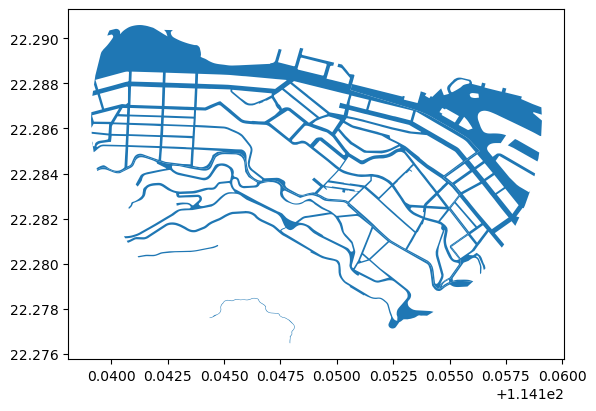

In [291]:
cutouts1 = gpd.GeoSeries(cutouts)
cutouts1.plot()

In [292]:
print(road/circle, road/zoned)

0.17099076979877223 0.24910737746988337
